---
title: Unsupervised Learning with Linear Algebra Blog
author: Dean Smith
date: '2023-5-9'
image: "penguins.png"
description: "In this blog I will use linear algebra to perform unsupervised learning processes."
format: html
---

# Unsupervised Learning with Linear Algebra

In this blog, I will first perform image reconstruction on an rbg image of a dog from the internet using linear algebra. Next I will use linear algebra to try and predict an imported karate club social network. You can find my source code here: 

First, I will import my source code along with other packages.

In [1]:
import numpy as np
import PIL
import urllib
from unsupervisedLearning import UnsupervisedFunctions
from matplotlib import pyplot as plt

functions = UnsupervisedFunctions()

Next, I will read in my image from a url.

In [2]:
def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))

url = "https://canine.org/wp-content/uploads/2023/05/23Graduation_promo-1-copy.jpg"

img = read_image(url)

Now I will make an instance of the image in black and white to reduce the size of the image. Lets see below both images and the shape of the black and white image.

(1159, 1500)

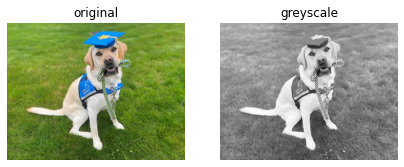

In [3]:
fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

grey_img = to_greyscale(img)

axarr[0].imshow(img)
axarr[0].axis("off")
axarr[0].set(title = "original")

axarr[1].imshow(grey_img, cmap = "Greys")
axarr[1].axis("off")
axarr[1].set(title = "greyscale")

grey_img.shape

Finally, lets show the progression of reconstructing the image from a value of k = 1 to k = 33.

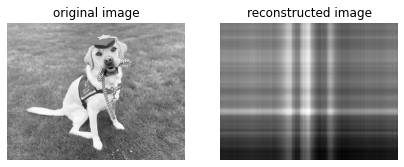

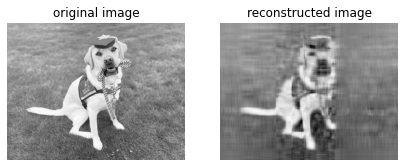

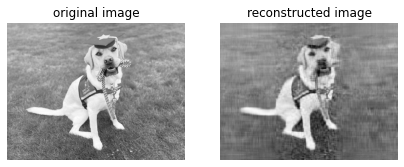

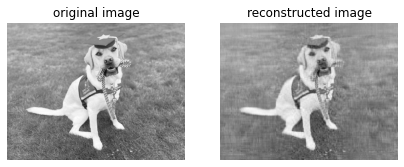

In [4]:
for i in range(1, 40, 10):
    functions.svd_reconstruct(grey_img, i)

Now, lets import and see the karate club social network.

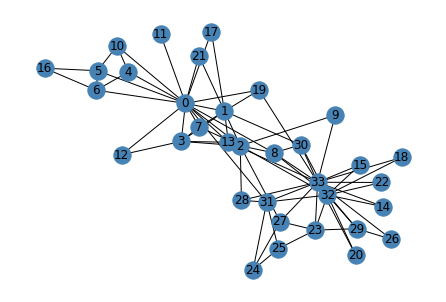

In [5]:
import networkx as nx
G = nx.karate_club_graph()
layout = nx.layout.fruchterman_reingold_layout(G)
nx.draw(G, layout, with_labels=True, node_color = "steelblue")

Lets now use the laplacian matrix, eigenvalues, and some linear algebra to predict what the divide in the karate club will look like.

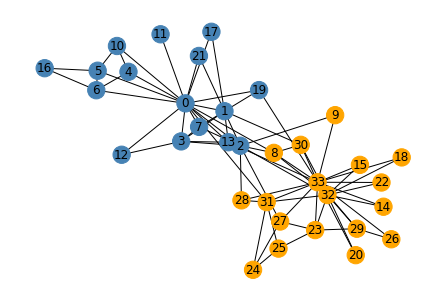

In [6]:
L = nx.normalized_laplacian_matrix(G)
normalized_laplacian = L.toarray()

values, vectors = np.linalg.eig(normalized_laplacian)

z_ = vectors[:, 1]

z = z_ > 0

node_colors = np.where(z == True, "steelblue", "orange")

nx.draw(G, layout, with_labels=True, node_color = node_colors)

To conclude, through this blog I have presented two processes of unsupervised learning using linear algebra. Image reconstruction is incredibly useful when it comes to managing and storing large datasets of images. Spectral Community Detection is useful when it comes to finding trends amongst networks which has many applications.